# EDA Milestone:
# Exploratory Data Analysis on AirBnB Dataset


## Context
Airbnb is an online marketplace for people to rent places to stay. 

Airbnb has rolled out a new service to help listers set prices. Airbnb makes a percentage commission off of the listings, so they are incentivized to help listers price optimally; that is, at the maximum possible point where they will still close a deal. You are an Airbnb consultant helping with this new pricing service.

## Goal

We are going to focus on a question: which features are helpful for finding out the appropriate listing price?

## Importing necessary packages

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Reading airbnb_nyc.csv file to open dataset

In [11]:
airbnb_nyc = pd.read_csv('airbnb_nyc.csv')
airbnb_nyc.head()

id                                               name  \
0  2539                 Clean & quiet apt home by the park   
1  3647                THE VILLAGE OF HARLEM....NEW YORK !   
2  7750                  Huge 2 BR Upper East  Cental Park   
3  8505                 Sunny Bedroom Across Prospect Park   
4  8700  Magnifique Suite au N de Manhattan - vue Cloitres   

                                             summary  \
0           Renovated apt home in elevator building.   
1                                                NaN   
2                                                NaN   
3  Just renovated sun drenched bedroom in a quiet...   
4  Suite de 20 m2 a 5 min des 2 lignes de metro a...   

                                         description experiences_offered  \
0  Renovated apt home in elevator building. Spaci...                none   
1  WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...                none   
2  Large Furnished 2BR one block  to Central Park...                none   
3  Just renovated sun drenched bedroom in a quiet...                none   
4  Suite de 20 m2 a 5 min des 2 lignes de metro a...                none   

                               neighborhood_overview  \
0    Close to Prospect Park and Historic Ditmas Park   
1                                                NaN   
2                                                NaN   
3  Quiet and beautiful Windsor Terrace. The apart...   
4                                                NaN   

                                             transit  \
0  Very close to F and G trains and Express bus i...   
1                                                NaN   
2                                                NaN   
3  Ten minutes walk to the 15th sheet F&G train s...   
4                                       Metro 1 et A   

                                         house_rules  host_id  host_since  \
0  -The security and comfort of all our guests is...     2787     39698.0   
1  Upon arrival please have a legibile copy of yo...     4632     39777.0   
2                                                NaN    17985     39953.0   
3  - No shoes in the house - Quiet hours after 11...    25326     40006.0   
4                                                NaN    26394     40014.0   

   ... hot_tub_sauna_or_pool  internet  long_term_stays  pets_allowed  \
0  ...                    -1         1                1            -1   
1  ...                    -1         1               -1            -1   
2  ...                    -1         1               -1             1   
3  ...                    -1         1               -1            -1   
4  ...                    -1         1               -1            -1   

   private_entrance secure self_check_in  smoking_allowed  accessible  \
0                -1      1             1               -1           1   
1                -1     -1            -1               -1          -1   
2                -1     -1            -1               -1          -1   
3                -1     -1            -1               -1          -1   
4                -1     -1            -1               -1          -1   

  event_suitable  
0              1  
1             -1  
2             -1  
3             -1  
4             -1  

[5 rows x 81 columns]

## Looking at dataset detailes
> Checking features of the dataset helps to take look at the big picture and get an idea of how does it look like.

In [12]:
airbnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

In [13]:
airbnb_nyc.describe()

id       host_id    host_since  host_response_rate  \
count  3.017900e+04  3.017900e+04  30170.000000        17082.000000   
mean   2.088031e+07  7.238659e+07  42160.939211            0.913360   
std    1.090207e+07  8.296663e+07    841.819786            0.190183   
min    2.539000e+03  2.787000e+03  39698.000000            0.000000   
25%    1.127817e+07  9.165996e+06  41552.000000            0.910000   
50%    2.175022e+07  3.314970e+07  42141.500000            1.000000   
75%    3.093442e+07  1.168645e+08  42787.000000            1.000000   
max    3.648724e+07  2.743213e+08  43653.000000            1.000000   

       host_is_superhost  host_listings_count  host_identity_verified  \
count       30170.000000         30170.000000            30170.000000   
mean            0.083560            16.073285                0.487305   
std             0.276731            91.709777                0.499847   
min             0.000000             0.000000                0.000000   
25%             0.000000             1.000000                0.000000   
50%             0.000000             1.000000                0.000000   
75%             0.000000             2.000000                1.000000   
max             1.000000          1070.000000                1.000000   

           latitude     longitude  accommodates  ...  hot_tub_sauna_or_pool  \
count  30179.000000  30179.000000  30179.000000  ...           30179.000000   
mean      40.728593    -73.952292      2.723781  ...              -0.902316   
std        0.054541      0.044117      1.700634  ...               0.431082   
min       40.499790    -74.244420      1.000000  ...              -1.000000   
25%       40.690720    -73.982085      2.000000  ...              -1.000000   
50%       40.721450    -73.955280      2.000000  ...              -1.000000   
75%       40.762790    -73.936435      4.000000  ...              -1.000000   
max       40.913060    -73.716900     16.000000  ...               1.000000   

           internet  long_term_stays  pets_allowed  private_entrance  \
count  30179.000000     30179.000000   30179.00000      30179.000000   
mean       0.951887        -0.693893      -0.64134         -0.681898   
std        0.306454         0.720090       0.76727          0.731459   
min       -1.000000        -1.000000      -1.00000         -1.000000   
25%        1.000000        -1.000000      -1.00000         -1.000000   
50%        1.000000        -1.000000      -1.00000         -1.000000   
75%        1.000000        -1.000000      -1.00000         -1.000000   
max        1.000000         1.000000       1.00000          1.000000   

             secure  self_check_in  smoking_allowed    accessible  \
count  30179.000000   30179.000000     30179.000000  30179.000000   
mean      -0.850028      -0.648696        -0.889460     -0.876470   
std        0.526746       0.761060         0.457021      0.481464   
min       -1.000000      -1.000000        -1.000000     -1.000000   
25%       -1.000000      -1.000000        -1.000000     -1.000000   
50%       -1.000000      -1.000000        -1.000000     -1.000000   
75%       -1.000000      -1.000000        -1.000000     -1.000000   
max        1.000000       1.000000         1.000000      1.000000   

       event_suitable  
count    30179.000000  
mean        -0.937838  
std          0.347080  
min         -1.000000  
25%         -1.000000  
50%         -1.000000  
75%         -1.000000  
max          1.000000  

[8 rows x 65 columns]

## Finding numerical columns (To do analysis on)

In [20]:
numerical_cols = list(airbnb_nyc.select_dtypes(include=['number']).columns)
numerical_cols

['id',
 'host_id',
 'host_since',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'check_in_24h',
 'air_conditioning',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 '

In [23]:
data = airbnb_nyc[numerical_cols]
data

id    host_id  host_since  host_response_rate  host_is_superhost  \
0          2539       2787     39698.0                1.00                0.0   
1          3647       4632     39777.0                1.00                0.0   
2          7750      17985     39953.0                1.00                0.0   
3          8505      25326     40006.0                1.00                1.0   
4          8700      26394     40014.0                 NaN                0.0   
...         ...        ...         ...                 ...                ...   
30174  36484363  107716952     42722.0                0.86                0.0   
30175  36484665    8232441     41504.0                0.63                0.0   
30176  36485057    6570630     41419.0                0.40                0.0   
30177  36485609   30985759     42104.0                1.00                0.0   
30178  36487245   68119814     42480.0                 NaN                0.0   

       host_listings_count  host_identity_verified  latitude  longitude  \
0                      6.0                     1.0  40.64749  -73.97237   
1                      1.0                     1.0  40.80902  -73.94190   
2                      2.0                     1.0  40.79685  -73.94872   
3                      2.0                     0.0  40.65599  -73.97519   
4                      1.0                     1.0  40.86754  -73.92639   
...                    ...                     ...       ...        ...   
30174                  2.0                     0.0  40.69137  -73.80844   
30175                  1.0                     1.0  40.67853  -73.94995   
30176                  2.0                     0.0  40.70184  -73.93317   
30177                  7.0                     1.0  40.75751  -73.99112   
30178                  0.0                     1.0  40.76404  -73.98933   

       accommodates  ...  hot_tub_sauna_or_pool  internet  long_term_stays  \
0                 2  ...                     -1         1                1   
1                 2  ...                     -1         1               -1   
2                 4  ...                     -1         1               -1   
3                 2  ...                     -1         1               -1   
4                 2  ...                     -1         1               -1   
...             ...  ...                    ...       ...              ...   
30174             6  ...                     -1         1               -1   
30175             3  ...                     -1         1               -1   
30176             1  ...                     -1        -1               -1   
30177             1  ...                     -1         1               -1   
30178             2  ...                     -1         1               -1   

       pets_allowed  private_entrance  secure  self_check_in  smoking_allowed  \
0                -1                -1       1              1               -1   
1                -1                -1      -1             -1               -1   
2                 1                -1      -1             -1               -1   
3                -1                -1      -1             -1               -1   
4                -1                -1      -1             -1               -1   
...             ...               ...     ...            ...              ...   
30174            -1                -1      -1              1               -1   
30175            -1                 1      -1              1               -1   
30176            -1                -1      -1             -1               -1   
30177            -1                -1      -1              1               -1   
30178            -1                -1      -1             -1                1   

       accessible  event_suitable  
0               1               1  
1              -1              -1  
2              -1              -1  
3              -1              -1  
4              -1              -1  
...          

## Data Visualization

<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

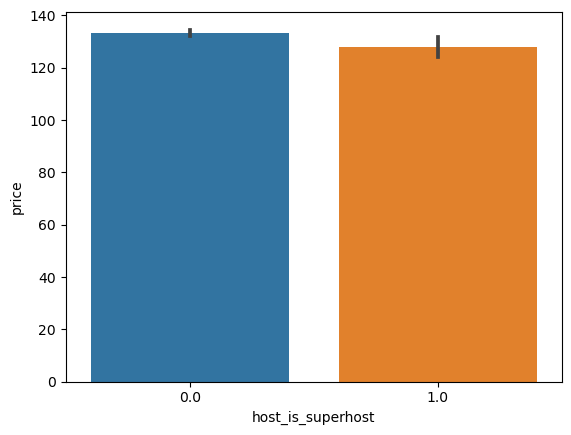

In [24]:
sns.barplot(data=data, x="host_is_superhost", y="price")

<AxesSubplot:xlabel='accommodates', ylabel='price'>

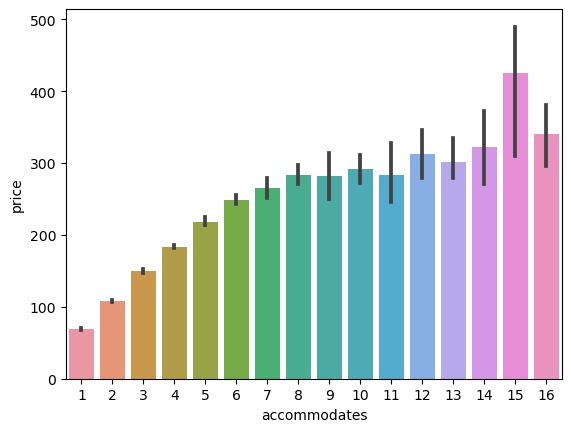

In [26]:
sns.barplot(data=data, x="accommodates", y="price")

In [27]:
data['accommodates'].value_counts()

2     13380
1      5538
4      4656
3      3147
6      1340
5      1260
8       318
7       262
10      116
9        49
12       36
16       29
14       19
11       16
13        7
15        6
Name: accommodates, dtype: int64

### Histogram for ```price``` 

<AxesSubplot:xlabel='price', ylabel='Count'>

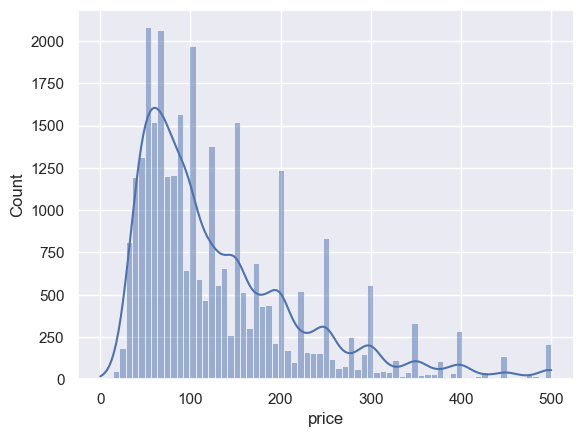

In [30]:
sns.set_theme()
sns.histplot(data = data, x = "price", kde = True)

### Histogram for ```price``` for listings that are ```long_term_stays``` vs. short-term
> According to the graph, places offering "long-term stays" are less than shoert terms.

<AxesSubplot:xlabel='price', ylabel='Count'>

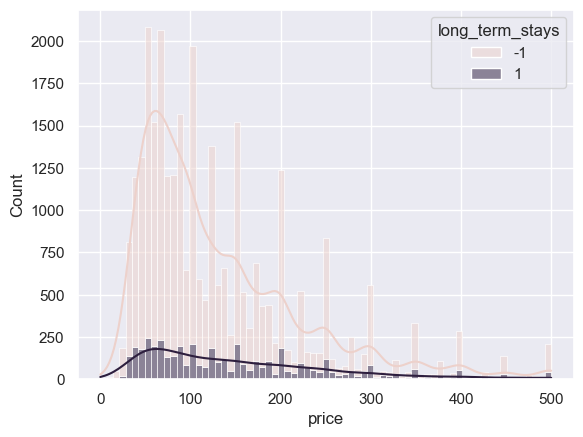

In [32]:
sns.histplot(data = data, x = 'price', hue = 'long_term_stays', kde = True, multiple="stack")

### Box plots for prices for each number of bedrooms


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

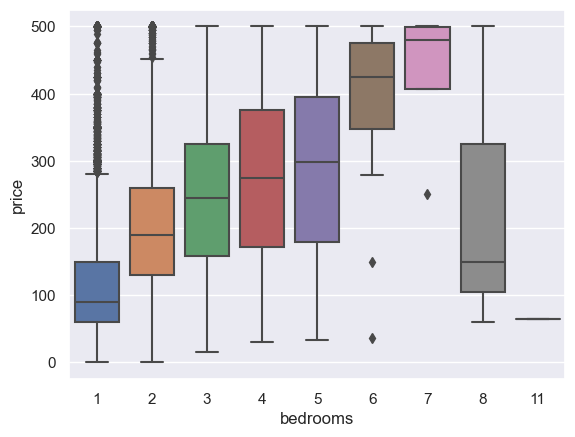

In [34]:
sns.boxplot(data = data, y = 'price', x = 'bedrooms')

In [35]:
data['bedrooms'].value_counts()

1     24254
2      4321
3      1241
4       279
5        62
6        14
7         4
8         3
11        1
Name: bedrooms, dtype: int64

### What conditions / facilities do have impact on the price?
> Based on the box plots below, conditions like having **air_conditioning, bbq, tv, elevator gym and the type of room** has a big impact on the price. More investigation needed.

<AxesSubplot:xlabel='long_term_stays', ylabel='price'>

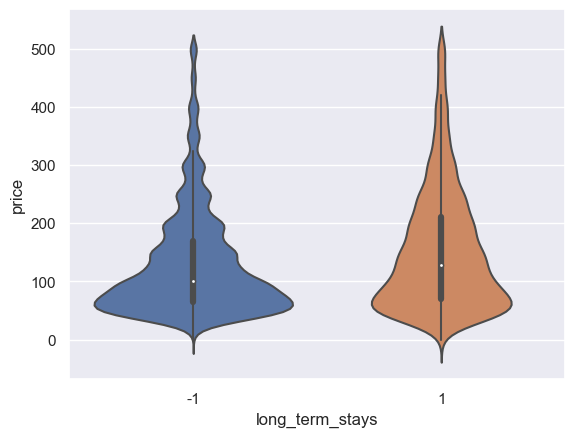

In [36]:
sns.violinplot(data = data, y = 'price', x = 'long_term_stays')

<AxesSubplot:xlabel='air_conditioning', ylabel='price'>

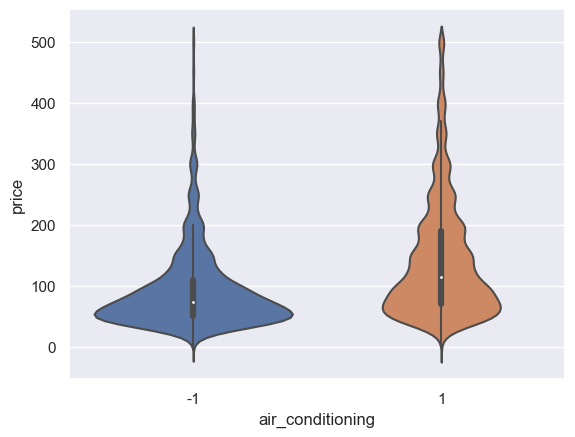

In [37]:
sns.violinplot(data = data, y = 'price', x = 'air_conditioning')

<AxesSubplot:xlabel='bbq', ylabel='price'>

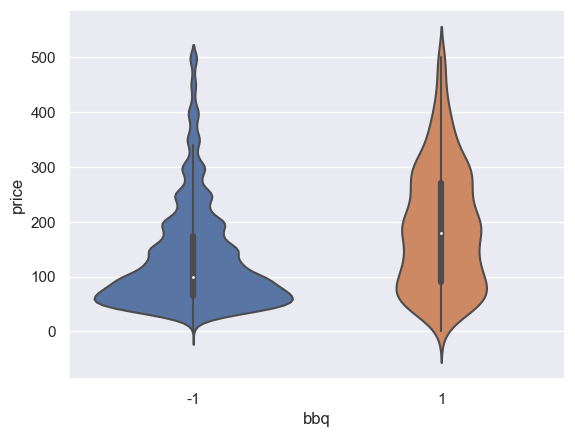

In [39]:
sns.violinplot(data = data, y = 'price', x = 'bbq')

<AxesSubplot:xlabel='tv', ylabel='price'>

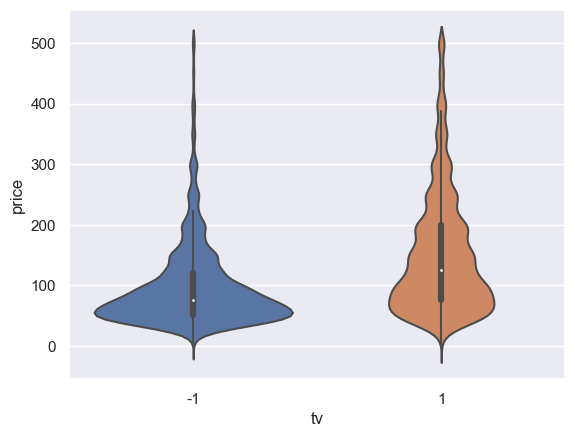

In [41]:
sns.violinplot(data = data, y = 'price', x = 'tv')

<AxesSubplot:xlabel='elevator', ylabel='price'>

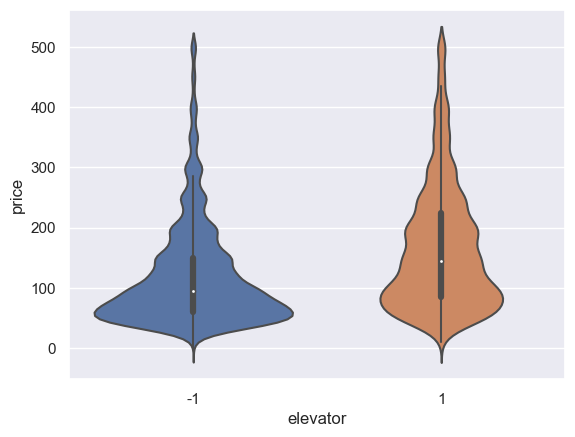

In [42]:
sns.violinplot(data = data, y = 'price', x = 'elevator')

<AxesSubplot:xlabel='gym', ylabel='price'>

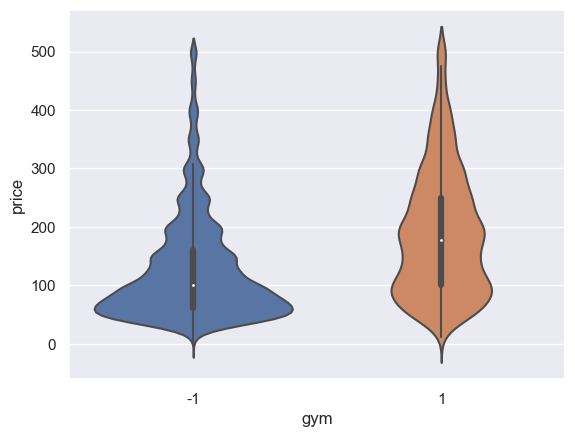

In [44]:
sns.violinplot(data = data, y = 'price', x = 'gym')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'moderate'),
  Text(1, 0, 'strict_14_with_grace_period'),
  Text(2, 0, 'flexible'),
  Text(3, 0, 'super_strict_30'),
  Text(4, 0, 'super_strict_60')])

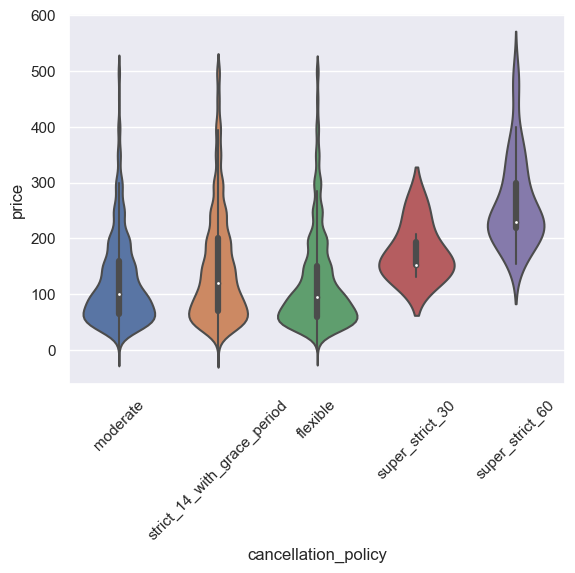

In [47]:
sns.violinplot(data = airbnb_nyc, y = 'price', x = 'cancellation_policy')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='room_type', ylabel='price'>

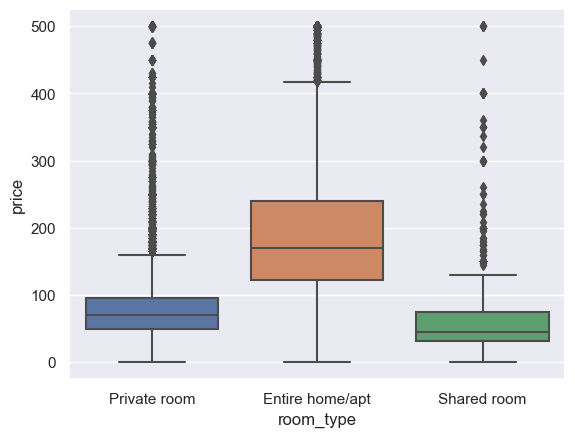

In [48]:
sns.boxplot(data = airbnb_nyc, y = 'price', x = 'room_type')

### Which factors are most correlated with price (positive or negative)?

In [52]:
corr = pd.DataFrame(data.corr()['price'])
corr = corr.rename(columns={'price': 'Correlation with price'})
pd.options.display.max_columns = None
pd.options.display.max_rows = None

corr

Correlation with price
id                                                          0.027533
host_id                                                     0.028931
host_since                                                 -0.009671
host_response_rate                                          0.034280
host_is_superhost                                          -0.016325
host_listings_count                                         0.194891
host_identity_verified                                     -0.022861
latitude                                                    0.079542
longitude                                                  -0.294196
accommodates                                                0.571541
bathrooms                                                   0.163276
bedrooms                                                    0.454539
beds                                                        0.421355
price                                                       1.000000
guests_included                                             0.321970
extra_people                                                0.075439
minimum_nights                                              0.048627
has_availability                                                 NaN
availability_30                                             0.075208
availability_60                                             0.099858
availability_90                                             0.093483
availability_365                                            0.118864
number_of_reviews                                          -0.029229
number_of_reviews_ltm                                      -0.011481
review_scores_rating                                        0.064228
review_scores_accuracy                                      0.033125
review_scores_cleanliness                                   0.095329
review_scores_checkin                                       0.014043
review_scores_communication                                 0.017169
review_scores_location                                      0.140308
review_scores_value                                        -0.005942
instant_bookable                                            0.024415
calculated_host_listings_count                              0.185098
calculated_host_listings_count_entire_homes                 0.218890
calculated_host_listings_count_private_rooms               -0.127504
calculated_host_listings_count_shared_rooms                -0.101389
reviews_per_month                                           0.063172
check_in_24h                                                0.053180
air_conditioning                                            0.196582
high_end_electronics                                        0.027578
bbq                                                         0.110258
balcony                                                     0.079413
nature_and_views                                            0.000173
bed_linen                                                   0.105295
breakfast                                                   0.007514
tv                                                          0.271563
coffee_machine                                              0.133457
cooking_basics                                              0.087954
white_goods                                                 0.214283
elevator                                                    0.229610
gym                                                         0.209892
child_friendly                                              0.206189
parking                                                    -0.019383
outdoor_space                                               0.046216
host_greeting                                              -0.051356
hot_tub_sauna_or_pool                                       0.064996
internet                                                    0.024220
long_term_stays                             

In [53]:
corr[(corr['Correlation with price'] > 0.3 ) | (corr['Correlation with price'] < -0.3 )]

Correlation with price
accommodates                   0.571541
bedrooms                       0.454539
beds                           0.421355
price                          1.000000
guests_included                0.321970

In [54]:
corr[(corr['Correlation with price'] > 0.2 ) | (corr['Correlation with price'] < -0.2 )]

Correlation with price
longitude                                                 -0.294196
accommodates                                               0.571541
bedrooms                                                   0.454539
beds                                                       0.421355
price                                                      1.000000
guests_included                                            0.321970
calculated_host_listings_count_entire_homes                0.218890
tv                                                         0.271563
white_goods                                                0.214283
elevator                                                   0.229610
gym                                                        0.209892
child_friendly                                             0.206189

<AxesSubplot:xlabel='Correlation with price', ylabel='Count'>

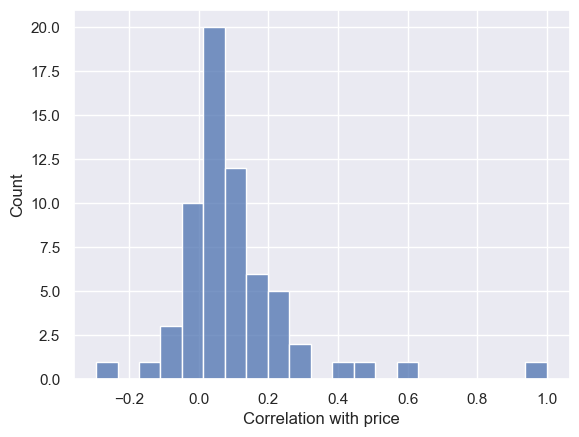

In [57]:
sns.histplot(data = corr, x = 'Correlation with price')

### factors most correlated with price:
>- Correlation between different conditions and price shows that **accommodates, bedrooms, beds and if guest is included** have the most effect on price, respectively.

>- Box plots of **number of bedrooms**, and conditions like having **tv, white goods, elevator, gym and being child_friendly** demonstrate that these conditions also have impact on the price. Correlation results confirms this observation. 

>- Surprisingly, houses with specifically 8 bedrooms and more, are not that expensive. 
    - It looks like the more the nuumber of rooms, the more is the price. But after 8 bedrooms the price drops drastically.
    - To investigate more, counting the number of values shows that there are only a few places with more than 8 bedrooms.In contrast, there are more than thousands values for 1-3 bedrooms which makes the result of the analysis way more valuable.
    - Therefore we can not consider that visualization relible.

>- Shared rooms and private rooms have approximately the same price but definitly the price for entire house/apartment is more expensive. I expected that private rooms are more expensive.

## Using the heat maps, let's understand the price distribution with the location

In [72]:
import folium
import numpy as np

my_map = folium.Map(location = [np.median(data['latitude']), np.median(data['longitude'])], zoom_start = 9)
folium.Marker([np.median(data['latitude']), np.median(data['longitude'])], popup="<b>My location</b>").add_to(my_map)

my_map

In [75]:
from folium.plugins import HeatMap

loc_price = data[["latitude", "longitude", "price"]].dropna()
loc_price

my_map.add_child(HeatMap(loc_price, min_opacity=0.25, radius = 13, blur = 7))


### Using the heat maps, let's understand the `review_scores_rating` distribution with the location

In [79]:
loc_score_rating = data[["latitude", "longitude", "review_scores_rating"]].dropna()
loc_score_rating

my_map.add_child(HeatMap(loc_score_rating, min_opacity=0.25, radius = 13, blur = 7))

In [81]:
data[["price", "review_scores_rating"]].corr()

price  review_scores_rating
price                 1.000000              0.064228
review_scores_rating  0.064228              1.000000